# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data Collection and Processing

In [2]:
car_df = pd.read_csv('car.csv')

In [3]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [4]:
car_df.shape

(301, 9)

In [6]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car_df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [11]:
car_df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [12]:
car_df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [19]:
car_df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_en = LabelEncoder()

In [16]:
car_df['Seller_Type'] = label_en.fit_transform(car_df.Seller_Type)

In [17]:
car_df['Fuel_Type'] = label_en.fit_transform(car_df.Fuel_Type)

In [18]:
car_df['Transmission'] = label_en.fit_transform(car_df.Transmission)

In [20]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,2,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,2,0,1,0
3,wagon r,2011,2.85,4.15,5200,2,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,1,0
297,brio,2015,4.00,5.90,60000,2,0,1,0
298,city,2009,3.35,11.00,87934,2,0,1,0
299,city,2017,11.50,12.50,9000,1,0,1,0


# Train Test Split

In [21]:
x = car_df.drop(['Car_Name', 'Selling_Price'], axis=1)

In [22]:
y = car_df['Selling_Price']

In [23]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,2,0,1,0
1,2013,9.54,43000,1,0,1,0
2,2017,9.85,6900,2,0,1,0
3,2011,4.15,5200,2,0,1,0
4,2014,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,1,0
297,2015,5.90,60000,2,0,1,0
298,2009,11.00,87934,2,0,1,0
299,2017,12.50,9000,1,0,1,0


In [24]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

In [27]:
x_train.shape

(270, 7)

In [28]:
x_test.shape

(31, 7)

In [29]:
y_train.shape

(270,)

In [30]:
y_test.shape

(31,)

# Linear Regression

# Training Model

In [31]:
linear = LinearRegression()

In [32]:
linear.fit(x_train, y_train)

LinearRegression()

# Model Evaluation

In [34]:
# Accuracy on the train data
x_train_pred = linear.predict(x_train)
# R-squared error
r2_score = metrics.r2_score(y_train, x_train_pred)
print(r2_score)
# Mean absolute Error
mse_score = metrics.mean_absolute_error(y_train, x_train_pred)
print(mse_score)

0.8799451660493698
1.2166174093917916


In [35]:
# Accuracy on test data
x_test_pred = linear.predict(x_test)
# R-squared error
r2_score = metrics.r2_score(y_test, x_test_pred)
print(r2_score)
# Mean absolute Error
mse_score = metrics.mean_absolute_error(y_test, x_test_pred)
print(mse_score)

0.8365766715025347
1.1516382156621008


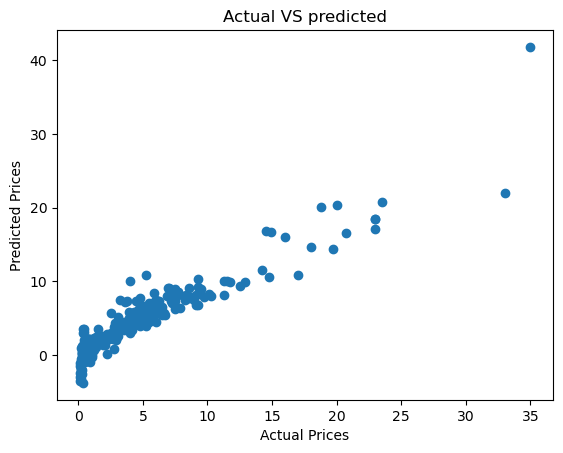

In [36]:
# Visualize the actual prices and predicted prices for training data
plt.scatter(y_train, x_train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

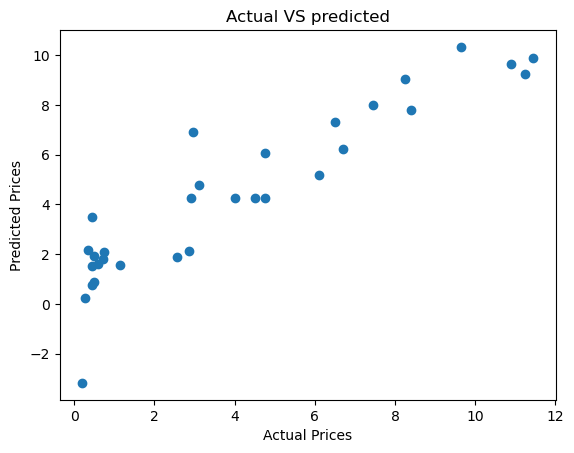

In [37]:
# Visualize the actual prices and predicted prices for testing data
plt.scatter(y_test, x_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

# Lasso Regression

# Train Test Split

In [38]:
x = car_df.drop(['Car_Name', 'Selling_Price'], axis=1)

In [39]:
y = car_df['Selling_Price']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=2)

# Training Model

In [41]:
lasso = Lasso()

In [43]:
lasso.fit(x_train, y_train)

Lasso()

# Model Evaluation

In [44]:
# Accuracy on the train data
x_train_pred = lasso.predict(x_train)
# R-squared error
r2_score = metrics.r2_score(y_train, x_train_pred)
print(r2_score)
# Mean absolute Error
mse_score = metrics.mean_absolute_error(y_train, x_train_pred)
print(mse_score)

0.8427856123435794
1.2863097696916528


In [45]:
# Accuracy on test data
x_test_pred = lasso.predict(x_test)
# R-squared error
r2_score = metrics.r2_score(y_test, x_test_pred)
print(r2_score)
# Mean absolute Error
mse_score = metrics.mean_absolute_error(y_test, x_test_pred)
print(mse_score)

0.8709167941173195
1.0507413774170433


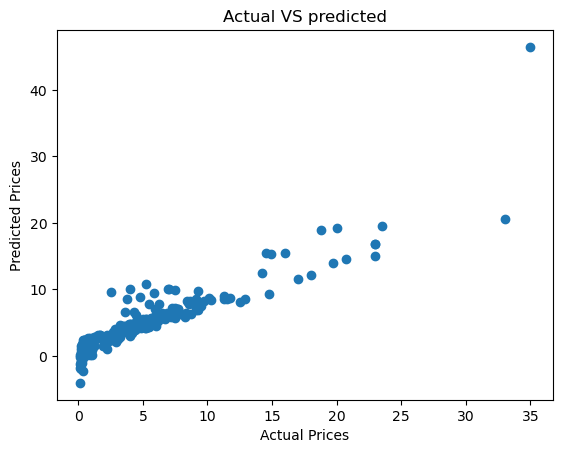

In [46]:
# Visualize the actual prices and predicted prices for training data
plt.scatter(y_train, x_train_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

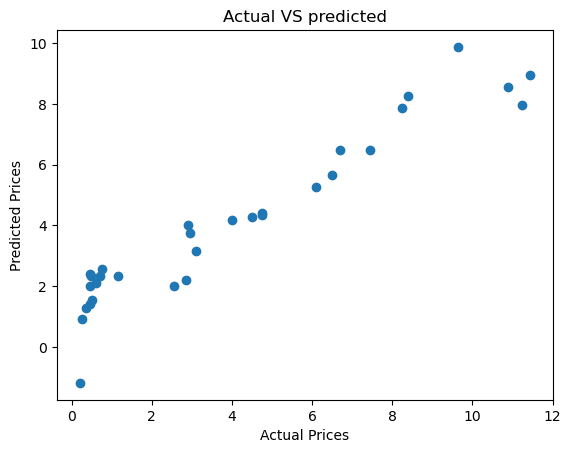

In [47]:
# Visualize the actual prices and predicted prices for testing data
plt.scatter(y_test, x_test_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual VS predicted')
plt.show()

# Predictive System

In [48]:
input_data = [2014, 5.59, 27000, 2, 0, 1, 0]
# Changing the ip data to an numpy array
input_array = np.asarray(input_data)
# Reshape the numpy array
input_reshape = input_array.reshape(1,-1)
# Make prediction
prediction = lasso.predict(input_reshape)
prediction

C:\Users\91638\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


array([3.8257306])

In [49]:
# The model Predicted Correctly!